In [34]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,
    mean_absolute_error,
    mean_squared_error,
    median_absolute_error)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [36]:
# Load data
exoplanets = pd.read_csv("exoplanets_clean.csv")

In [38]:
# Identify targets
planetary_targets = [
    'planet_mass_earth_mass',
    'planet_radius_earth_radius',
    'orbital_period_days',
    'orbit_semi_major_axis_au',
    'planet_density_gcm3']

In [40]:
# Identify features
stellar_features = [
    'stellar_effective_temp_k',
    'stellar_radius_solar_radius',
    'stellar_mass_solar_mass',
    'stellar_metallicity_dex',
    'stellar_luminosity_log_solar',
    'stellar_surface_gravity_log10_cms2',
    'stellar_age_gyr',
    'stellar_density_gcm3',
    'stellar_rotational_velocity_kms',
    'stellar_rotational_period_days',
    'systemic_radial_velocity_kms']

In [42]:
print(exoplanets[stellar_features].isna().mean()) # Check for the percentage of NAs in each column. 

stellar_effective_temp_k              0.042156
stellar_radius_solar_radius           0.045957
stellar_mass_solar_mass               0.001209
stellar_metallicity_dex               0.082757
stellar_luminosity_log_solar          0.044921
stellar_surface_gravity_log10_cms2    0.046994
stellar_age_gyr                       0.207844
stellar_density_gcm3                  0.090705
stellar_rotational_velocity_kms       0.644091
stellar_rotational_period_days        0.875777
systemic_radial_velocity_kms          0.606945
dtype: float64


In [44]:
# Remove features with majority NA
stellar_features = [
    'stellar_effective_temp_k',
    'stellar_radius_solar_radius',
    'stellar_mass_solar_mass',
    'stellar_metallicity_dex',
    'stellar_luminosity_log_solar',
    'stellar_surface_gravity_log10_cms2',
    'stellar_age_gyr',
    'stellar_density_gcm3']

In [46]:
print(exoplanets[stellar_features].isna().mean()) # Check for the percentage of NAs in each column. Age is still high, but not majority. We will remove rows with NA later. 

stellar_effective_temp_k              0.042156
stellar_radius_solar_radius           0.045957
stellar_mass_solar_mass               0.001209
stellar_metallicity_dex               0.082757
stellar_luminosity_log_solar          0.044921
stellar_surface_gravity_log10_cms2    0.046994
stellar_age_gyr                       0.207844
stellar_density_gcm3                  0.090705
dtype: float64


In [48]:
# Prepare copy to add derived values
exoplanets_derived = exoplanets.copy()

# Calculate some derived values based on known physical proportionalities: 

# g ∝ M / R² 
exoplanets_derived['gravity_calculated'] = exoplanets['stellar_mass_solar_mass'] / (exoplanets['stellar_radius_solar_radius']**2)

# V ∝ M / ρ
exoplanets_derived['mass_density_ratio'] = exoplanets['stellar_mass_solar_mass'] / exoplanets['stellar_density_gcm3']

# R² 
exoplanets_derived['radius_squared'] = exoplanets['stellar_radius_solar_radius']**2

derived_features = [
    'gravity_calculated',
    'mass_density_ratio',
    'radius_squared']

In [50]:
# Combine features
all_features = stellar_features + derived_features

In [52]:
# Drop rows with NAs, keep only relevant features, and assign to new df
df = exoplanets_derived[all_features].dropna()

# Convert from df to array as VIF requires array
X = df.to_numpy()

# Calculate VIF for each feature.
# Code adapted from https://www.kaggle.com/code/carlmcbrideellis/variance-inflation-factor-vif-and-explainability
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Sort results by highest VIF score (most problematic variables)
print(vif_data.sort_values(by='VIF', ascending=False))

                               feature         VIF
0             stellar_effective_temp_k  516.023169
5   stellar_surface_gravity_log10_cms2  495.981617
2              stellar_mass_solar_mass  122.487333
1          stellar_radius_solar_radius  120.193732
8                   gravity_calculated   39.951229
10                      radius_squared   16.708056
4         stellar_luminosity_log_solar   15.980554
6                      stellar_age_gyr    3.681039
7                 stellar_density_gcm3    2.675115
9                   mass_density_ratio    1.931139
3              stellar_metallicity_dex    1.222675


In [54]:
# Remove collineated variables via content knowledge and trial error
derived_features = [
    'mass_density_ratio' 
]

stellar_features = [
    'stellar_surface_gravity_log10_cms2',
    'stellar_luminosity_log_solar',
    'stellar_age_gyr',
    'stellar_metallicity_dex',
    'stellar_density_gcm3']

# Repeat above process to gauge if collinearity has been properly dealt with
all_features = stellar_features + derived_features

df = exoplanets_derived[all_features].dropna()
X = df.to_numpy()

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                              feature       VIF
0  stellar_surface_gravity_log10_cms2  3.588537
2                     stellar_age_gyr  3.222059
4                stellar_density_gcm3  1.702292
1        stellar_luminosity_log_solar  1.577405
5                  mass_density_ratio  1.088728
3             stellar_metallicity_dex  1.059746



Target: planet_mass_earth_mass
Average R-squared: 0.0332
Average MAE: 348.5642
Average RMSE: 743.2660
Average Median AE: 218.5620


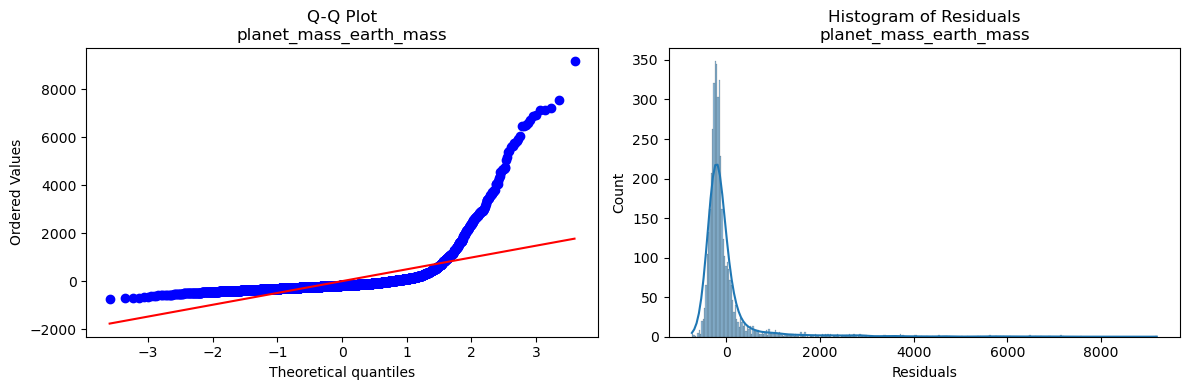


Target: planet_radius_earth_radius
Average R-squared: 0.1551
Average MAE: 3.7722
Average RMSE: 4.6803
Average Median AE: 3.1285


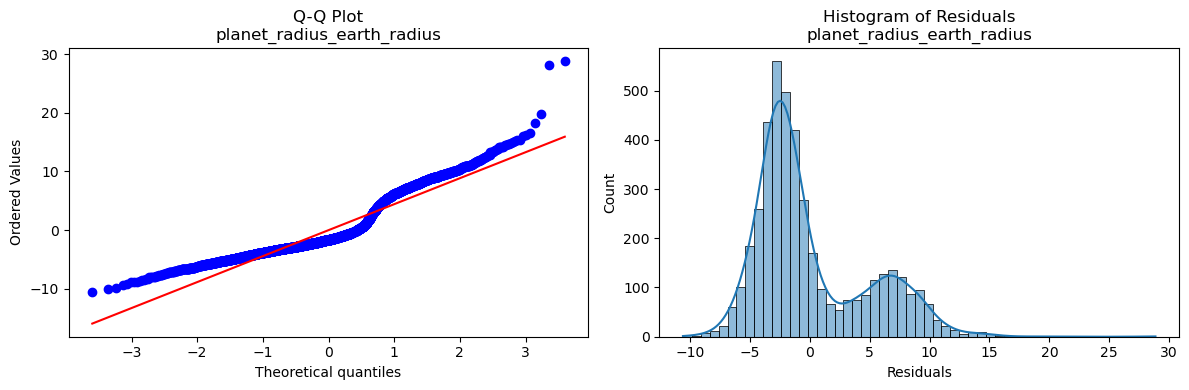


Target: orbital_period_days
Average R-squared: -32291.8850
Average MAE: 335986.2579
Average RMSE: 3077200.1795
Average Median AE: 169422.0101


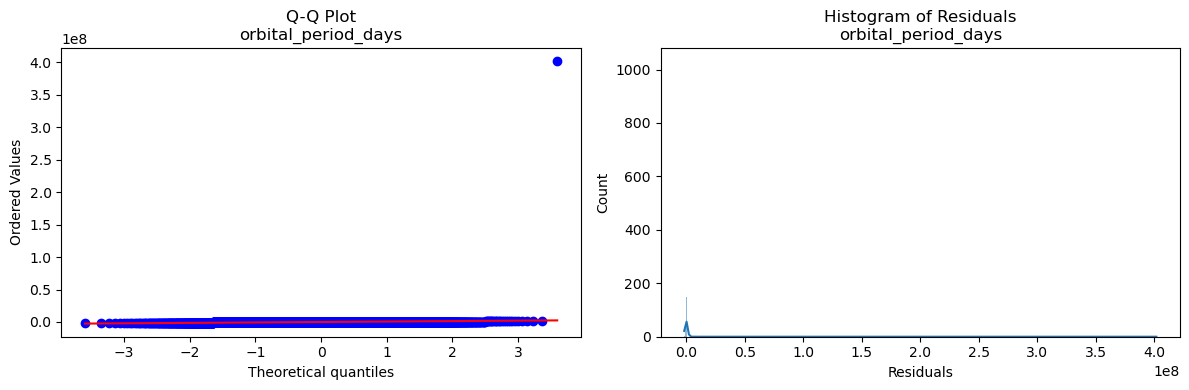


Target: orbit_semi_major_axis_au
Average R-squared: -3.8344
Average MAE: 28.2535
Average RMSE: 190.9246
Average Median AE: 16.2356


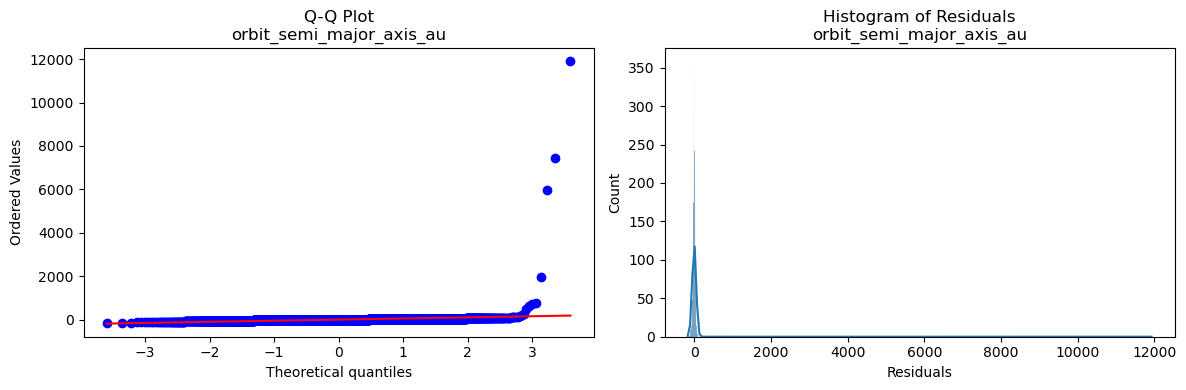


Target: planet_density_gcm3
Average R-squared: -0.0893
Average MAE: 3.8832
Average RMSE: 24.4232
Average Median AE: 2.2015


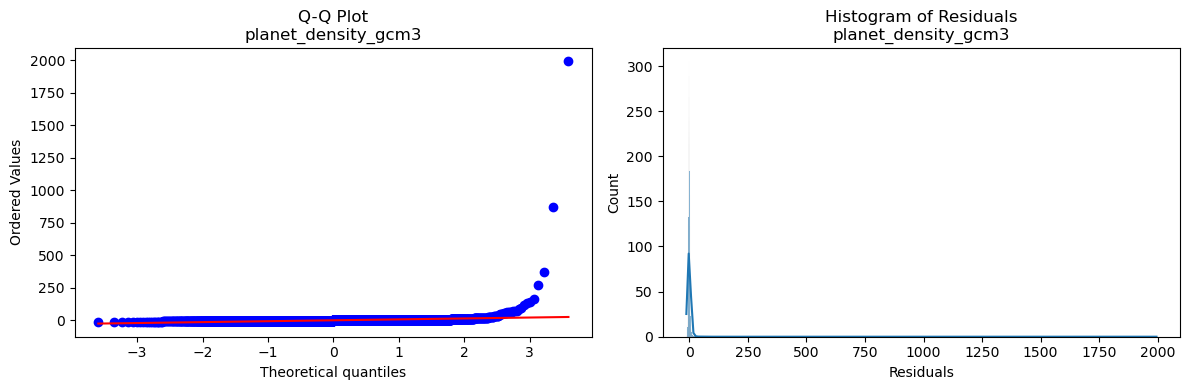

In [56]:
# A loop was created which could be copy and pasted for all the models, regardless of target lenght,
# with limited adjustments based on model type and variables necessary for specific evaluation or plotting. The loop loops through all taregts in the identified 
# target list above. Across each target, we fit the model and compute and store the accuracy metrics.
# We then average the results to have one value for each metric for each target. Plots are created using the stored
# residuals or other stored metrics, depending on the model. Metrics and plots are outputted. 

# K-fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42) # shuffle=True ensures random splitting
# of data for each fold. random_state ensures reproducibility.

# Loop through each target (inspiration originally from https://rpubs.com/ASAKS/forloop)
for target in planetary_targets:
    # Include only the selected features and the current target.
    # Drop rows with missing values in any of the selected columns
    df = exoplanets_derived[all_features + [target]].dropna() 
    # Assign features and current target as X and y 
    X = df[all_features] 
    y = df[target]

    # Blank list for storage of metrics and info for plotting
    r2_scores = []
    mae_scores = []
    rmse_scores = []
    medae_scores = []
    residuals = []

    # Code adapted from
    # https://stackoverflow.com/questions/69811310/actual-data-from-kfold-split-indices?
    # Loop through the train and test indices for each of the 5 K-fold splits.
    # This gives a new training and testing set in each iteration
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        # Apply linear regression model to the split data 
        # Code adapted from https://www.datacamp.com/tutorial/sklearn-linear-regression
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics of predictions and add to blank list. Do the same for all of the residuals for graphing. 
        r2_scores.append(r2_score(y_test, y_pred)) # Append value to above list
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        medae_scores.append(median_absolute_error(y_test, y_pred))
        residuals.extend(y_test - y_pred) # Extend since this is an array

    # Calculate average across the folds for each metric. Residuals do not need to be
    # averaged, they are used for graphing. 
    avg_r2 = np.mean(r2_scores)
    avg_mae = np.mean(mae_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_medae = np.mean(medae_scores)

    # Print results
    print(f"\nTarget: {target}")
    print(f"Average R-squared: {avg_r2:.4f}")
    print(f"Average MAE: {avg_mae:.4f}")
    print(f"Average RMSE: {avg_rmse:.4f}")
    print(f"Average Median AE: {avg_medae:.4f}")


    # Create a subplot to plot the Q-Q plot and histogram of residuals for each target in the loop.
    # These plots check for LR assumptions: https://www.jmp.com/en/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions
    # https://www.datacamp.com/tutorial/qq-plot 
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    stats.probplot(residuals, dist="norm", plot=axs[0]) # Plot a probplot QQ since our quantities are different scales
    # https://stats.stackexchange.com/questions/585566/what-are-the-main-difference-between-a-qq-plot-and-a-probability-plot-for-measur
    axs[0].set_title(f"Q-Q Plot\n{target}") # Label each graph with the target

    sns.histplot(residuals, kde=True, ax=axs[1]) # Plot a histogram of the residuals with a kde curve overlaid https://python-graph-gallery.com/20-basic-histogram-seaborn/
    axs[1].set_title(f"Histogram of Residuals\n{target}") # Label each graph with the target
    axs[1].set_xlabel("Residuals")

    plt.tight_layout()
    plt.show()

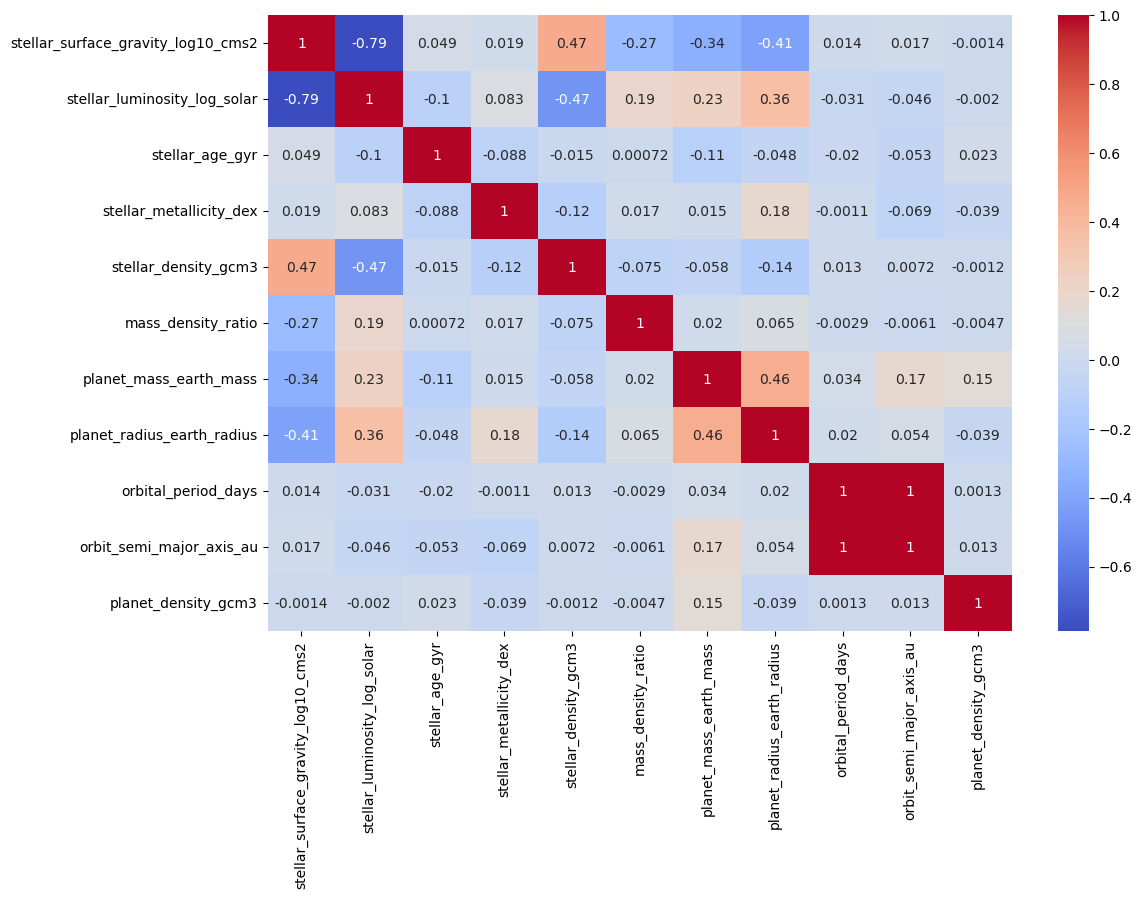

In [72]:
# Create heat map of the correlations between stellar features and planetary targets
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr = exoplanets_derived[all_features + planetary_targets].corr(method='pearson') # Pearson assumes linear relationship
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## The only variables with warm, positive correlations with stellar features are planet mass and radius. 


Target: planet_radius_earth_radius
Average R-squared: 0.1584
Average MAE: 3.7639
Average RMSE: 4.6741
Average Median AE: 3.1073


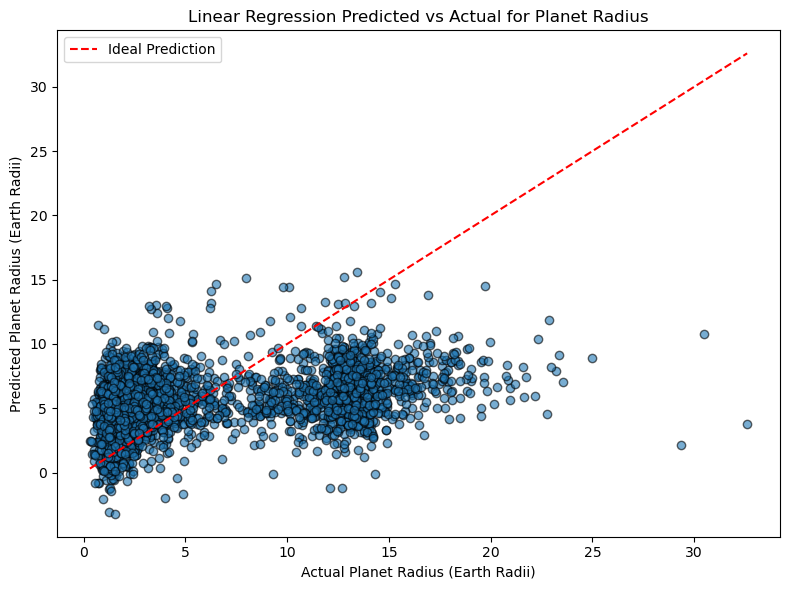

In [73]:
# Re-run model with just the best predicted target to visualize
target = 'planet_radius_earth_radius'

# Code from above
df = exoplanets_derived[all_features + [target]].dropna()
X = df[all_features]
y = df[target]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions this time for graphing
predicts = []
actuals = []
r2_scores = []
mae_scores = []
rmse_scores = []
medae_scores = []

# Re-run model
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    medae_scores.append(median_absolute_error(y_test, y_pred))
    predicts.extend(y_pred)
    actuals.extend(y_test)

avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_medae = np.mean(medae_scores)

print(f"\nTarget: {target}")
print(f"Average R-squared: {avg_r2:.4f}")
print(f"Average MAE: {avg_mae:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average Median AE: {avg_medae:.4f}")

# Plot the actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
# Plot a red dashed diagonal line representing the ideal predictions
plt.plot([min(actuals), max(actuals)],
         [min(actuals), max(actuals)],
         color='red', linestyle='--', label='Ideal Prediction')
# Title and label plot
plt.xlabel('Actual Planet Radius (Earth Radii)')
plt.ylabel('Predicted Planet Radius (Earth Radii)')
plt.title('Linear Regression Predicted vs Actual for Planet Radius')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
# We interpret these regions as reflecting the formation regimes of terrestrial-like planets (radii less than 1.7 Earth radii),
# gas dwarf planets with rocky cores and hydrogen-helium envelopes (radii between 1.7 and 3.9 Earth radii)
# and ice or gas giant planets (radii greater than 3.9 Earth radii).
# https://pmc.ncbi.nlm.nih.gov/articles/PMC4048851/#:~:text=We%20interpret%20these%20regions%20as,greater%20than%203.9%20Earth%20radii)

# This study will be revisited as these classifications come from metallicity of stars. For now, it is used to determine cut offs for grouping of
# exoplanet radii to see if that assists in increasing accurate predictions. 


Target: planet_radius_earth_radius
Average R-squared: 0.0021
Average MAE: 0.2318
Average RMSE: 0.2835
Average Median AE: 0.2049


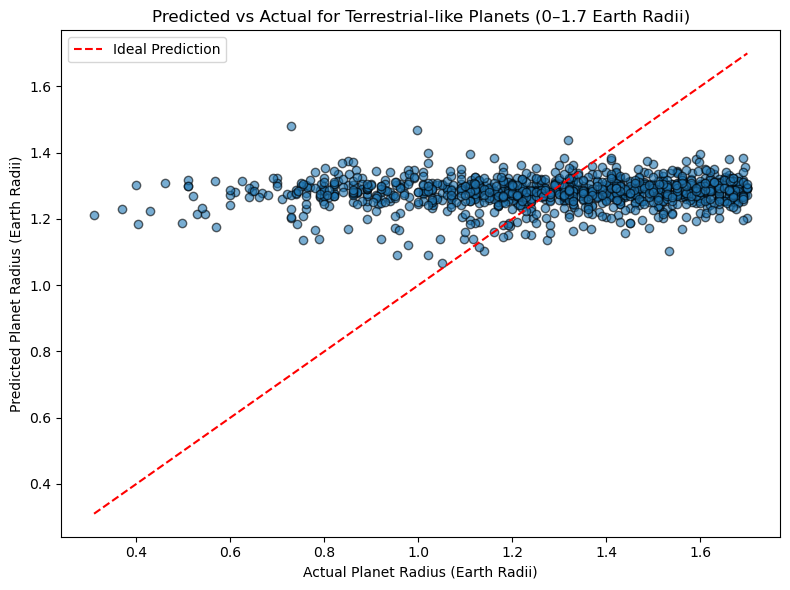

In [75]:
target = 'planet_radius_earth_radius'

# Keep only terrestrial-like planets (0–1.7 Earth radii)
df = exoplanets_derived[all_features + [target]].dropna()
df = df[(df[target] >= 0) & (df[target] <= 1.7)]

# Repeat above code to run model
X = df[all_features]
y = df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

predicts = []
actuals = []
r2_scores = []
mae_scores = []
rmse_scores = []
medae_scores = []

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    medae_scores.append(median_absolute_error(y_test, y_pred))
    predicts.extend(y_pred)
    actuals.extend(y_test)

avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_medae = np.mean(medae_scores)

print(f"\nTarget: {target}")
print(f"Average R-squared: {avg_r2:.4f}")
print(f"Average MAE: {avg_mae:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average Median AE: {avg_medae:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
plt.plot([min(actuals), max(actuals)],
         [min(actuals), max(actuals)],
         color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Planet Radius (Earth Radii)')
plt.ylabel('Predicted Planet Radius (Earth Radii)')
plt.title(f'Predicted vs Actual for Terrestrial-like Planets (0–1.7 Earth Radii)')
plt.legend()
plt.tight_layout()
plt.show()



Target: planet_radius_earth_radius
Average R-squared: 0.0295
Average MAE: 0.4372
Average RMSE: 0.5319
Average Median AE: 0.3944


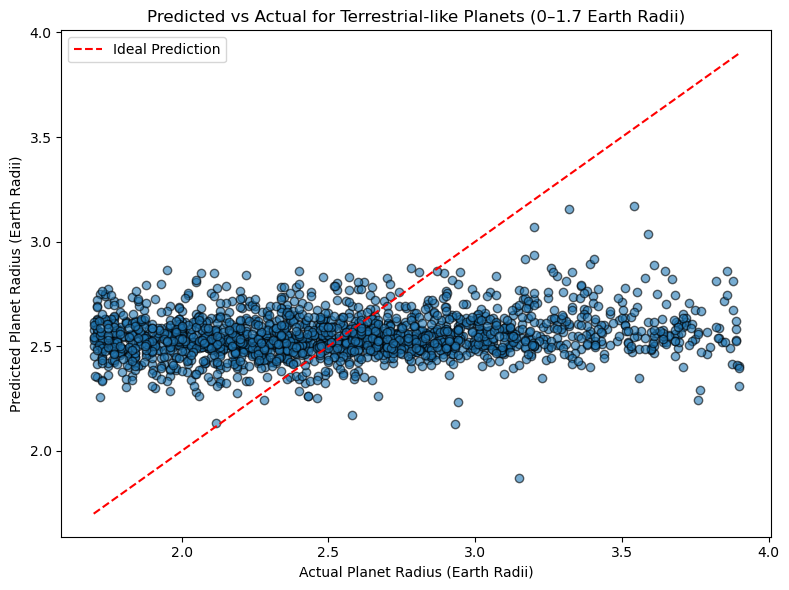

In [76]:
target = 'planet_radius_earth_radius'

# Repeat for only gas dwarfs (1.7-3.9 Earth radii)
df = exoplanets_derived[all_features + [target]].dropna()
df = df[(df[target] >= 1.7) & (df[target] <= 3.9)]

# Repeat above code to run model
X = df[all_features]
y = df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

predicts = []
actuals = []
r2_scores = []
mae_scores = []
rmse_scores = []
medae_scores = []

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    medae_scores.append(median_absolute_error(y_test, y_pred))
    predicts.extend(y_pred)
    actuals.extend(y_test)

avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_medae = np.mean(medae_scores)

print(f"\nTarget: {target}")
print(f"Average R-squared: {avg_r2:.4f}")
print(f"Average MAE: {avg_mae:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average Median AE: {avg_medae:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
plt.plot([min(actuals), max(actuals)],
         [min(actuals), max(actuals)],
         color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Planet Radius (Earth Radii)')
plt.ylabel('Predicted Planet Radius (Earth Radii)')
plt.title(f'Predicted vs Actual for Terrestrial-like Planets (0–1.7 Earth Radii)')
plt.legend()
plt.tight_layout()
plt.show()


Target: planet_radius_earth_radius
Average R-squared: 0.0021
Average MAE: 0.2318
Average RMSE: 0.2835
Average Median AE: 0.2049


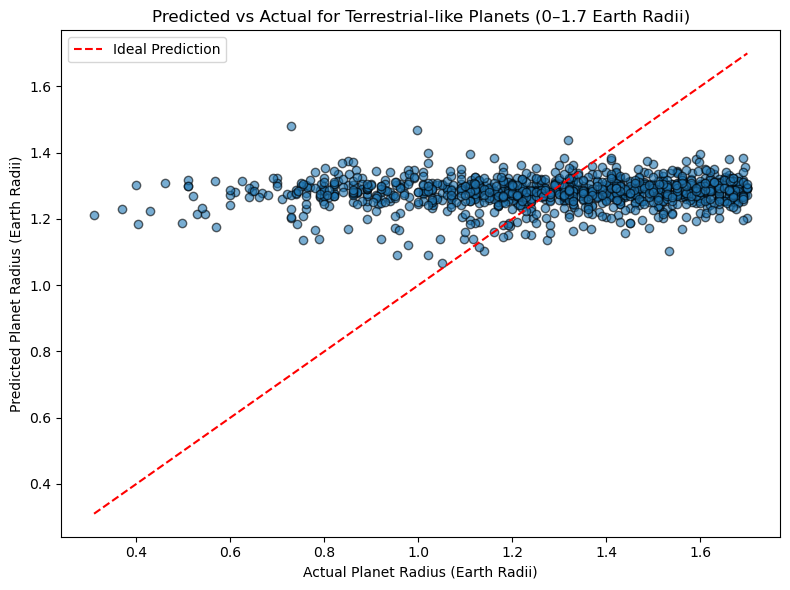

In [77]:
target = 'planet_radius_earth_radius'

# Keep only terrestrial-like planets (0–1.7 Earth radii)
df = exoplanets_derived[all_features + [target]].dropna()
df = df[(df[target] >= 0) & (df[target] <= 1.7)]

# Repeat above code to run model
X = df[all_features]
y = df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

predicts = []
actuals = []
r2_scores = []
mae_scores = []
rmse_scores = []
medae_scores = []

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    medae_scores.append(median_absolute_error(y_test, y_pred))
    predicts.extend(y_pred)
    actuals.extend(y_test)

avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_medae = np.mean(medae_scores)

print(f"\nTarget: {target}")
print(f"Average R-squared: {avg_r2:.4f}")
print(f"Average MAE: {avg_mae:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average Median AE: {avg_medae:.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actuals, predicts, alpha=0.6, edgecolors='k')
plt.plot([min(actuals), max(actuals)],
         [min(actuals), max(actuals)],
         color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Planet Radius (Earth Radii)')
plt.ylabel('Predicted Planet Radius (Earth Radii)')
plt.title(f'Predicted vs Actual for Terrestrial-like Planets (0–1.7 Earth Radii)')
plt.legend()
plt.tight_layout()
plt.show()
